In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
# New colormap including gridline color
colors = ['#000000','#1E93FF','#F93C31','#4FCC30','#FFDC00',
'#999999','#E53AA3','#FF851B','#87D8F1','#921231','#555555']
colormap = plt.matplotlib.colors.ListedColormap(colors)

In [3]:
base_path = './kaggle/input/arc-prize-2024/'
# Copied from the starter EDA notebook
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [4]:
training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')

In [27]:
task_ids = []
for key, value  in training_challenges.items():
    task_ids.append(key)
    
    print(value['test'][0]['input'])
    for i , _ in enumerate(value['train']):
        print(key,": " ,i)
        print(value['train'][i]['input'])
        print(value['train'][i]['output'])
    

[[7, 0, 7], [7, 0, 7], [7, 7, 0]]
007bbfb7 :  0
[[0, 7, 7], [7, 7, 7], [0, 7, 7]]
[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]
007bbfb7 :  1
[[4, 0, 4], [0, 0, 0], [0, 4, 0]]
[[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]
007bbfb7 :  2
[[0, 0, 0], [0, 0, 2], [2, 0, 2]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 2], [2, 0, 2, 0, 0, 0, 2, 0, 2]]
007bbfb7 :  3
[[6, 6, 0], [6, 0, 0],

In [17]:
# Change to display other examples from the training set
example_id = task_ids[1]

In [18]:
# Get the grids out of the json maze and convert to tensors
toy_train_x = []
toy_train_y = []
for example in training_challenges[example_id]['train']:
    toy_train_x.append(example['input'])
    toy_train_y.append(example['output'])
toy_valid_x = training_challenges[example_id]['test'][0]['input']
toy_valid_y = training_solutions[example_id][0]

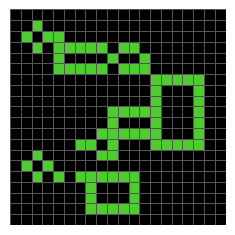

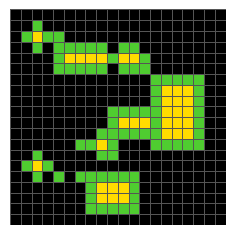

In [19]:
# Display a single grid
def show_grid(grid):
    fig = plt.figure(figsize=(2.8,2.8))
    ax = plt.gca()
    ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

show_grid(toy_valid_x)
show_grid(toy_valid_y)

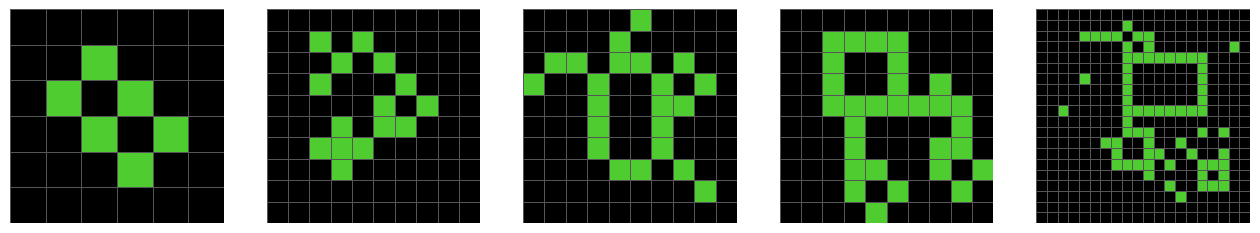

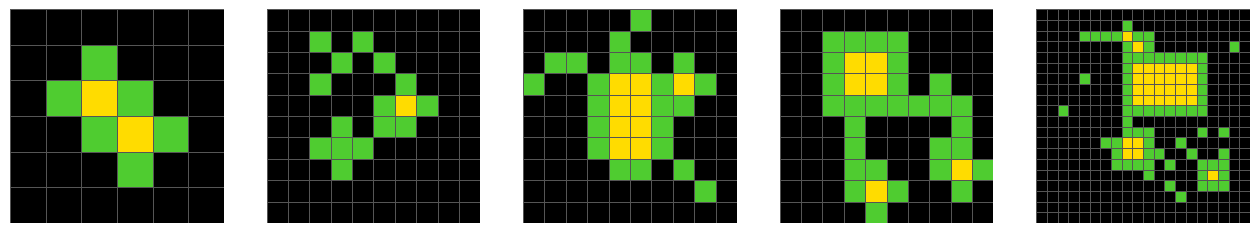

In [20]:
# Display an array of grids
def show_grids(grids):
    nrows, ncols = 1, max(5, len(grids))
    fig = plt.figure(figsize=(16,16))
    for i, grid in enumerate(grids):
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.pcolormesh(grid, edgecolors=colors[-1], linewidth=0.5, cmap=colormap, vmin=0, vmax=10)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.axis('off')
    plt.show()

show_grids(toy_train_x)
show_grids(toy_train_y)